<a href="https://colab.research.google.com/github/yoosoo13/yoosoo13/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C/%ED%98%BC%EA%B3%B5%ED%8C%8C5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94(%EB%A7%B7%ED%94%8C%EB%A1%AF%EB%A6%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-1. 맷플롯립 기본 요소 알아보기

## 그래프 표현
: 그래프 옵션 조절(크기조정, 모양변경)
- 피겨_Figure
- rcParams
- 서브플롯_subplot

In [1]:
import gdown
gdown.download('http://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: http://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 57.1MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


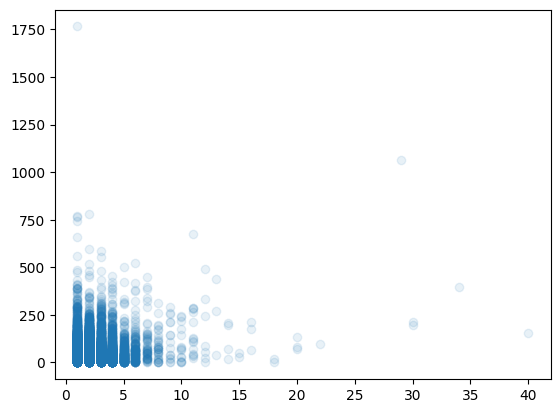

In [3]:
# 산점도 그려보기
import matplotlib.pyplot as plt

plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

## 그래프 크기 바꾸기


### 1. 피겨_Figure객체

In [4]:
# 현재 설치된 맷플롯립의 기본 그래프 크기 확인
print(plt.rcParams['figure.figsize'])

[6.4, 4.8]


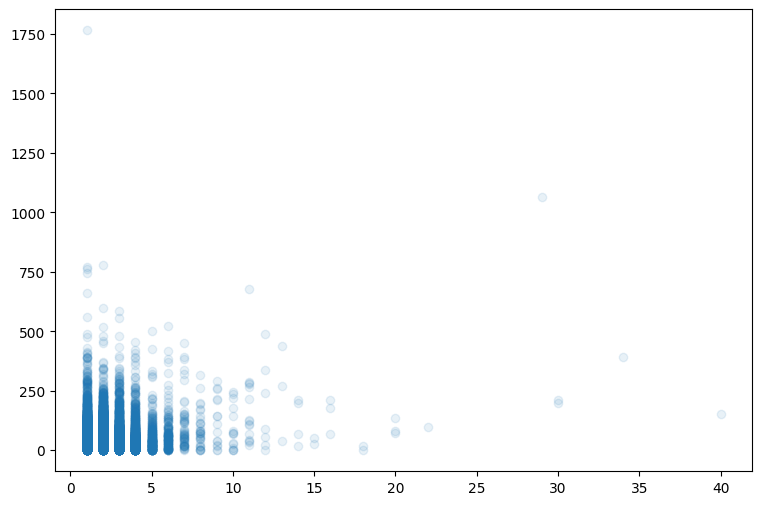

In [5]:
# 그래프 크기 바꾸기_ figsize매개변수 사용 → 그래프 크기를 튜플로 지정(기본 그래프 크기는 (너비_6,높이_4))

plt.figure(figsize=(9,6)) # 너비 9인치(23cm), 높이 6인치 객체 생성
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

In [6]:
# 그래프 실제 크기 확인 위해, 현재 설치된 맷플롯립의 기본 그래프 크기 DPI확인
print(plt.rcParams['figure.dpi'])

100.0


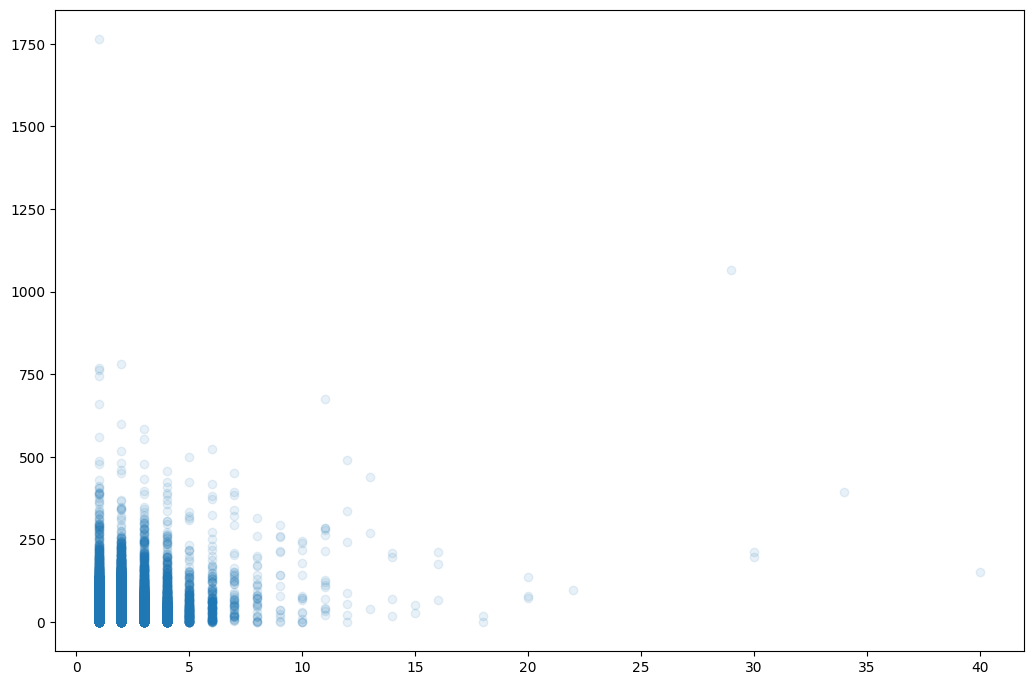

In [7]:
# 인치 값은 원하는 픽셀 값을 정한 다음 → 픽셀 값을 DPI로 나누면 구할 수 있음
# 900X600픽셀 크기의 그래프 그리고 싶다 (맷플롯립의 DPI 기본값은 72)
plt.figure(figsize=(900/72, 600/72))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

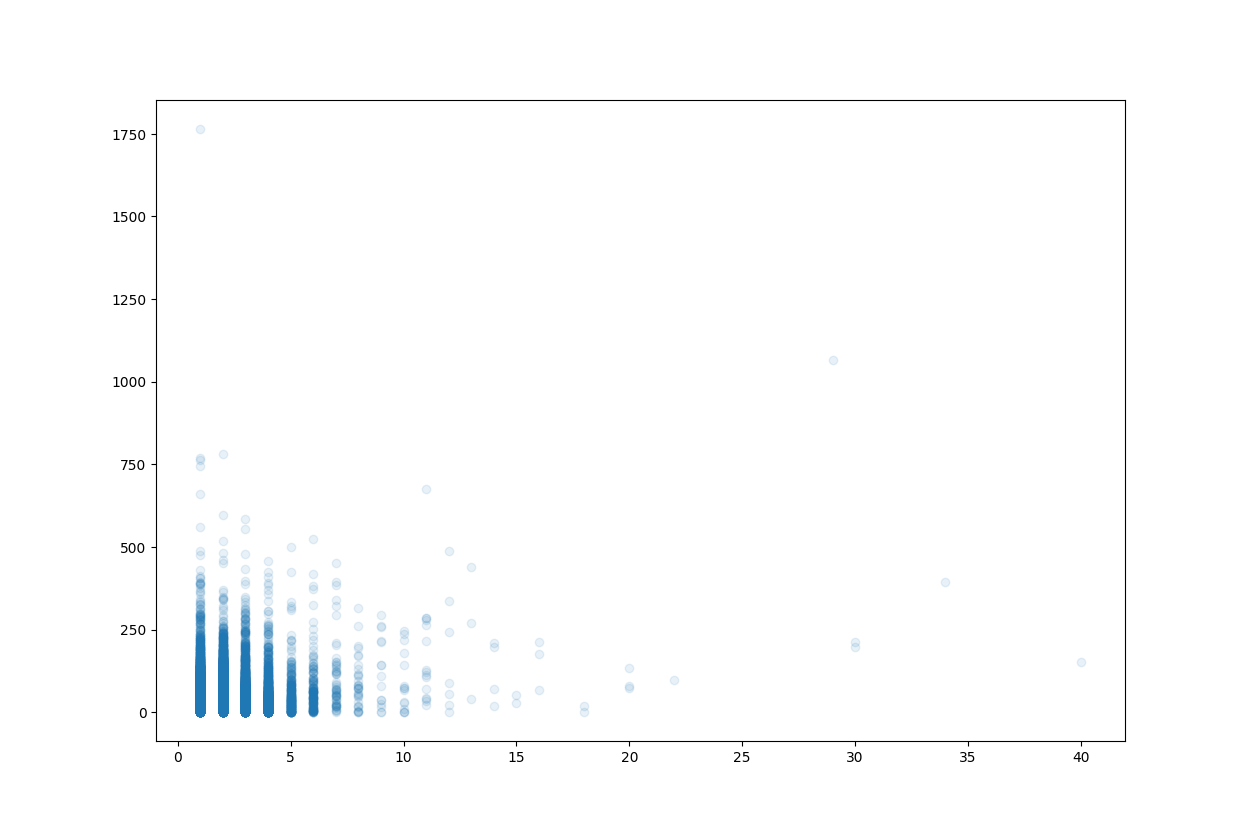

In [8]:
# 코랩 노트북의 타이트_tight 레이아웃 사용하지 않기 위해서, bbox_inches옵션을 None으로 지정
%config InlineBackend.print_figure_kwargs ={'bbox_inches' : None}
plt.figure(figsize=(900/72, 600/72))
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

# 주변에 공백이 많이 생김...실제 크기 900X600임을 확인할 수 있음

In [12]:
# 원래대로 타이트한 레이아웃으로 돌아가기
%config InlineBackend.print_figure_kwargs ={'bbox_inches' : 'tight'}

### 2. dpi 매개변수
- DPI 기본값인 72 → 144(2배 늘리기)

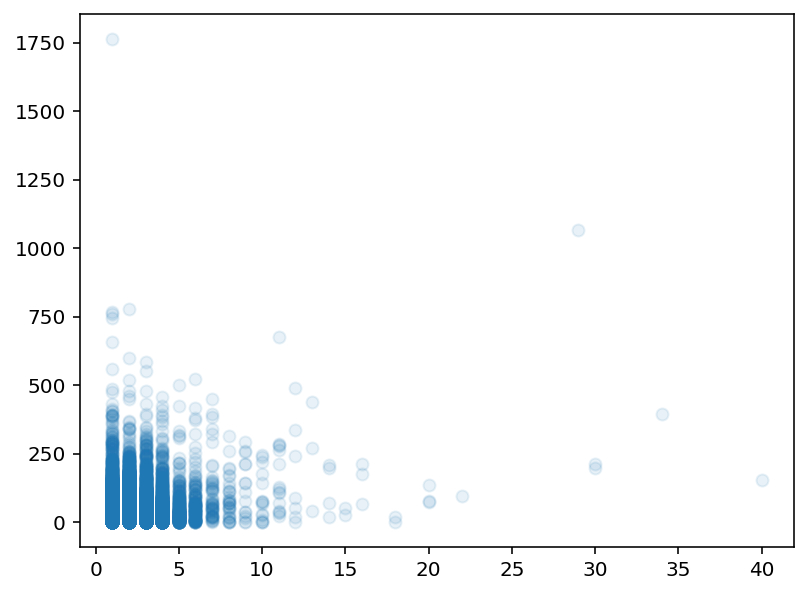

In [13]:
plt.figure(dpi=144)
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

# dpi매개변수를 두 배로 늘리면, 인치당 픽셀 수가 두 배로 늘어남 → 그래프가 2배 커짐

### rcParams 객체
- 맷플롯립 그래프의 기본값을 관리하는 객체
- 객체에 담긴 값을 출력, 새로운 값으로 바꿀 수 있음
- 이후에 그려지는 모든 그래프에 바뀐 설정이 적용됨


In [14]:
# 해상도 높이기 위해 DPI기본값 바꾸기
plt.rcParams['figure.dpi'] = 100

## 산점도 마커 모양 바꾸기
- rcParams 객체의 속성을 scatter.marker로 지정

In [15]:
plt.rcParams['scatter.marker']

'o'

In [16]:
plt.rcParams['scatter.marker'] = '*'

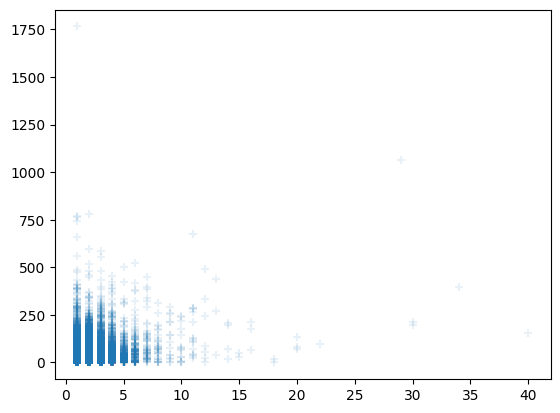

In [17]:
plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1, marker='+')
plt.show()

## 여러 개의 서브플롯 출력하기
- 서브플롯 : 하나의 피겨 객체 안에는 여러개의 서브플롯을 담을 수 있다.

### 서브플롯 그리기 : subplots()함수
- subplots() 함수는 피겨 객체와 각 서브플롯을 나타내는 Axes객체의 배열을 반환한다.

```
1. subplots() 함수로 두 개의 서브플롯을 그리고 싶다면 개배변수에 2를 넣어준다.
2. 배열의 원소에서 각각 scatter() 함수과 hist() 함수를 호출한다.
3-1. 첫 번째 그래프인 산점도 x축은 '도서권수'열 & y축은 '대출건수'열
3-2. 두 번째 그래프는 히스토그램으로 x축은 '대출건수'열, y축은 '대출건수의 빈도'
+ 히스토그램(두 번째 그래프)의 y축은 로그 스케일로 지정
```

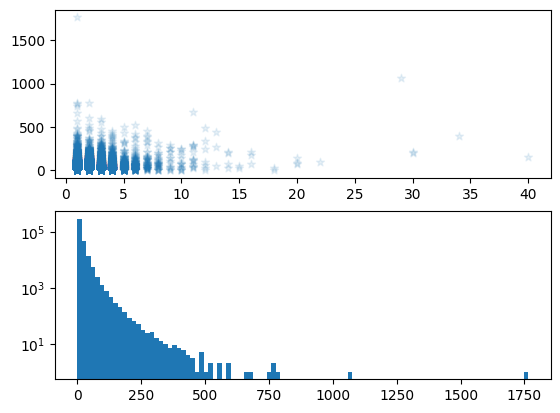

In [18]:
# 1
fig, axs = plt.subplots(2)

# 2 & 3-1
axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)

# 2 & 3-2
axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')

fig.show()

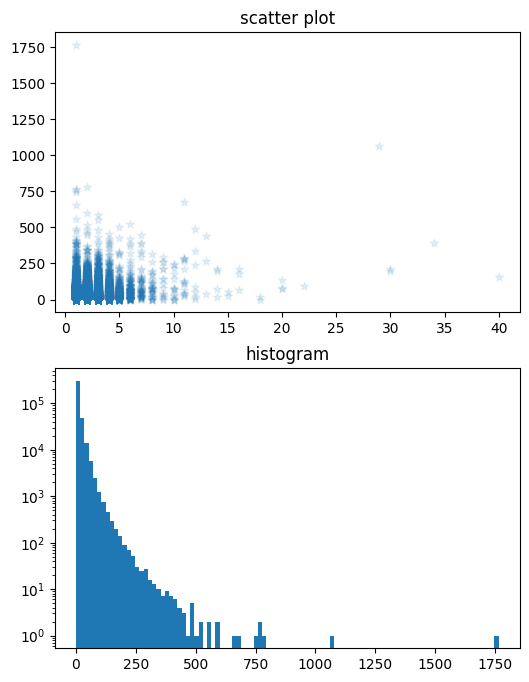

In [21]:
fig, axs = plt.subplots(2, figsize=(6,8))


axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
# 제목넣기
axs[0].set_title('scatter plot')

axs[1].hist(ns_book7['대출건수'], bins=100)
# 제목넣기
axs[1].set_title('histogram')
axs[1].set_yscale('log')

fig.show()

### 서브플롯을 가로로 나란히 출력하기

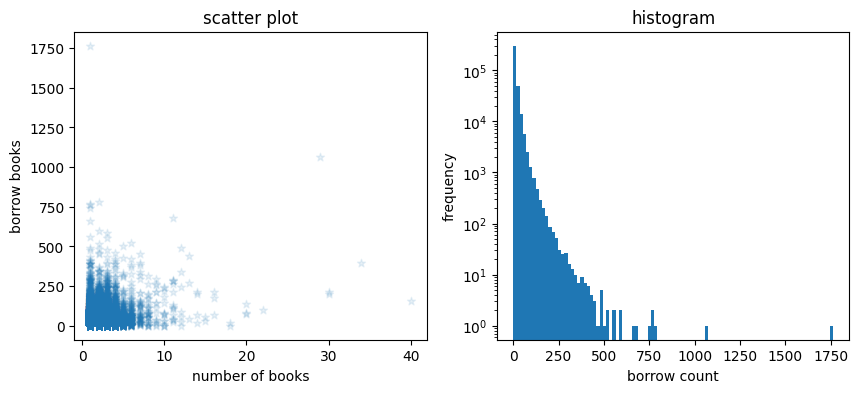

In [22]:
fig, axs = plt.subplots(1,2, figsize=(10,4))     # (1,2)는 1행에 2개의 열을 뜻함(가로로 나란히 출력) | 두 개의 열을 가진 서브플롯을 그리므로 피겨 객체의 너비를 늘려준다.


axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
# 제목넣기
axs[0].set_title('scatter plot')
# x축 표시
axs[0].set_xlabel('number of books')
# y축 표시
axs[0].set_ylabel('borrow books')

axs[1].hist(ns_book7['대출건수'], bins=100)
# 제목넣기
axs[1].set_title('histogram')
axs[1].set_yscale('log')
# x축 표시
axs[1].set_xlabel('borrow count')
# y축 표시
axs[1].set_ylabel('frequency')

fig.show()

_________
# 5-2. 선 그래프와 막대 그래프 그리기
- 선 그래프_line graph : 데이터 포인트 사이를 선으로 이은 그래프
- 막대 그래프_bar graph : 데이터 포인트의 크기를 막대 높이로 나타내는 그래프

> 한 축을 따라 어떤 데이터의 변화를 살펴보는데 용이(산점도와 조금 달라)

예. 연도별로 몇 권의 도서가 발행되었는지 시각화 가능(x축:연도, y축: 발행 도서 개수)

In [23]:
ns_book7.head(2)

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [25]:
# 연도별 도서 개수는 value_counts()메서드 사용
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

In [26]:
# 정렬
count_by_year = count_by_year.sort_index()
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [27]:
# 2023년 이후...자료도 있어?? 미래에 발행 될 도서가 대출 데이터에 들어있는 상황... → 2030년보다 작거나 같은 데이터만 추출
count_by_year = count_by_year[count_by_year.index <=2030]
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

## 주제별 도서 개수 구하기
- '주제분류번호'열의 첫 번째 문자를 기준으로 도서를 카운트하면 주제별 도서 개수 구할 수 있음

In [31]:
gr= ns_book7.groupby('주제분류번호')
gr_result = gr.size()  # 각 그룹별로 데이터 개수를 세어봅니다.
gr_result

# '주제분류번호'에는 NaN값도 있는데....

주제분류번호
001        116
001.04       4
001.07       3
001.073      4
001.079      2
          ... 
999.85      15
999.87       7
999.88       5
999.9        1
999.99      22
Length: 12467, dtype: int64

In [33]:
# '주제분류번호'열에는 도서관에서 책을 분류하는 기준인 십진분류 코드가 있음 → '주제분류번호'열의 첫 번째 문자를 기준으로 도서를 카운트하면 주제별 도서 개수 구할 수 있음
import numpy as np  # np.nan 사용위해 numpy임포트

# '주제분류번호' 열의 값이 NaN인 경우 -1을 반환, 그렇지 않으면 첫 번째 문자를 반환
def kdc_1st_char(no):
  if no is np.nan:
    return '-1'
  else:
    return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

# 8로 시작하는 도서가 가장 많은 것으로 나타

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

## 선 그래프_plot

In [34]:
# 해상도 높이기
# import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 100

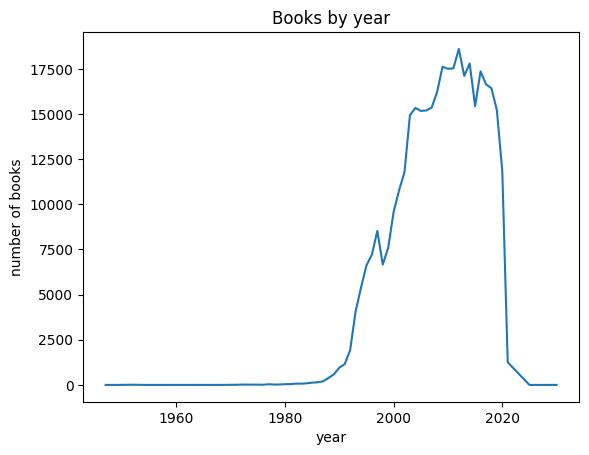

In [35]:
# count_by_year의 연도(index), 도서 개수(values)을 각각 지정하여 선 그래프 그리기
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

### 선 그래프 모양, 색상 바꾸기
- 선 그래프 모양_linestyle 매개변수
- 선 그래프 색상_color 매개변수



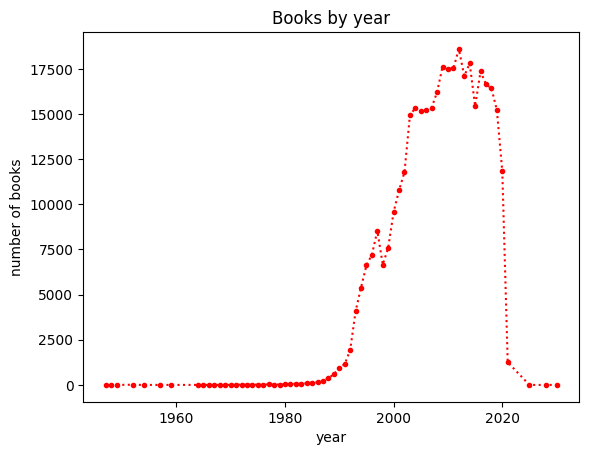

In [36]:
plt.plot(count_by_year, marker = '.', linestyle =':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

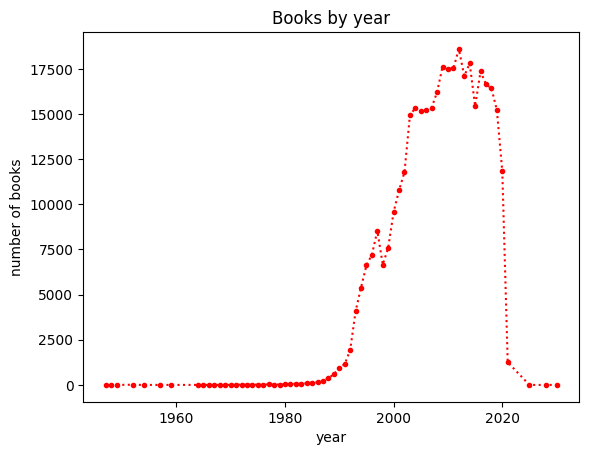

In [47]:
# 선그래프 모양, 색상 한 줄로 쿼리작성
plt.plot(count_by_year.index, count_by_year.values, '.:r') # '.:r'로 마커, 선 모양, 색깔 옵션을 하나의 문자열로 지정할 수 있음
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

In [ ]:
# 선그래프 모양, 색상 한 줄로 쿼리작성
plt.plot(count_by_year, '.:r') # '.:r'로 마커, 선 모양, 색깔 옵션을 하나의 문자열로 지정할 수 있음
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

### 선 그래프 눈금 개수 조절 및 마커에 텍스트 표시하기
- 그래프 눈금 : 틱_tick
- x축 눈금 개수 지정 : xticks()함수


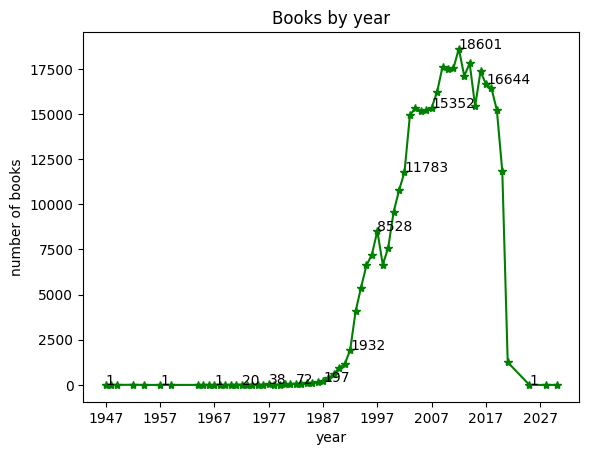

In [38]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

# 1947년부터 2030년까지 10년씩 건너뛰면서(range함수사용) x축 눈금 표시
plt.xticks(range(1947, 2030, 10))

# 연도별 발행 도서 개수를 모두 그래프에 표시하기엔 너무 多, 슬라이스연산자(:)로 다섯개씩 건너뛰면서 count_by_year값을 선택(시리즈 객체의 items()메서드를 사용하면 인덱스와 값을 감싼 튜플을 얻을 수 있음)
for idx, val in count_by_year[::5].items():
  plt.annotate(val,(idx,val))    # val :  그래프에 나타낼 문자열, (idx, val) : 텍스트가 나타날 x, y좌표

plt.show()

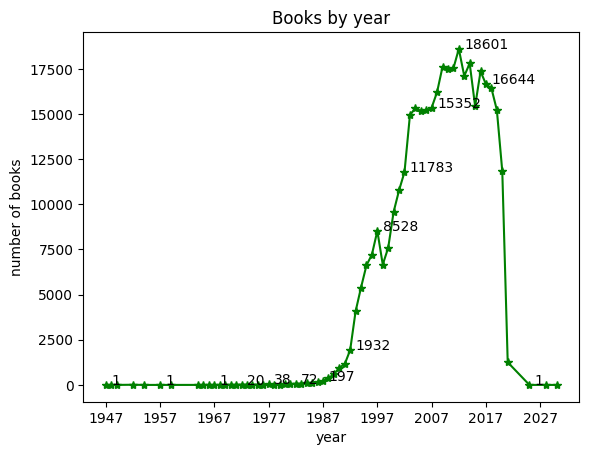

In [39]:
# 텍스트 위치 조절 : xytext매개변수사용
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val,(idx,val), xytext=(idx+1, val+10))
plt.show()

```
1. plt.annotate() 함수는 그래프에 주석을 추가하는 역할, 주석을 추가할 때 주로 데이터 포인트에 화살표와 텍스트를 표시함
2. val: 주석으로 표시할 내용으로, 즉 해당 연도의 도서 수
3. (idx, val): 주석을 달 데이터의 위치로, 해당 연도의 데이터를 가리키는 좌표
4. xytext=(idx + 1, val + 10): 주석의 텍스트를 표시할 위치로, 텍스트의 좌표, xytext로 지정한 위치에 주석 내용표시
5. (idx + 1, val + 10) : 데이터 포인트의 오른쪽 위에 주석이 표시되도록 지정한 것
  - idx + 1은 x축 방향으로 약간 이동시키고, val + 10은 y축 방향으로 약간 위로 이동시킵니다.
```

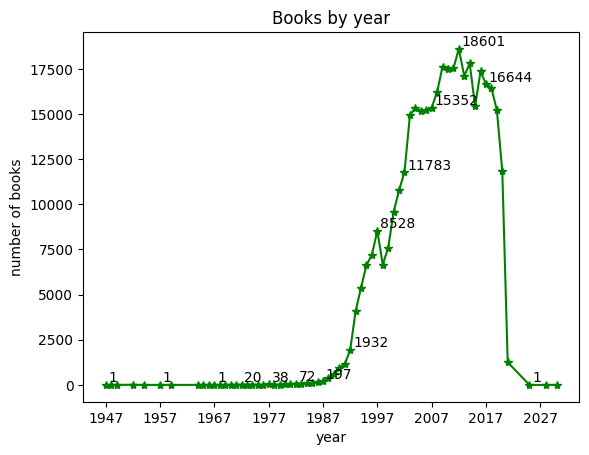

In [40]:
# xytext에서 y축은 큰 차이가 없다. → y축 스케일(0~17500)이 x축보다 훨씬 크기 때문 → textcoords매개변수 사용
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
  plt.annotate(val,(idx,val), xytext=(2,2), textcoords='offset points')
plt.show()

```
textcoords='offset points'
1. xytext 매개변수에서 지정한 좌표가 데이터 포인트로부터 얼마나 떨어진 위치인지를 나타내는 것
2. 'offset points'는 픽셀 단위의 이동을 나타내며, 텍스트의 위치가 데이터 포인트에서 얼마나 떨어져 있는지 지정
```

## 막대 그래프_bar
- 기본 막대 그래프 : 세로
  - width매개변수
  - (idx, val)
  - ha : 텍스트 위치(right, center, left)

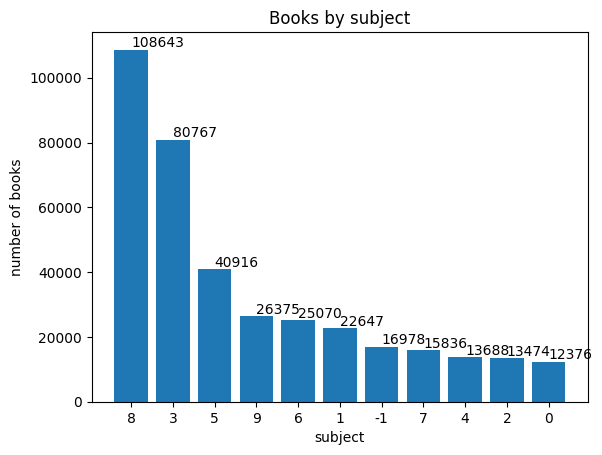

In [46]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points')
plt.show()

### 막대 그래프 텍스트 정렬, 막대 조절 및 색상 바꾸기
- 텍스트 위치 조절 : annotate() 함수의 ha매개변수에 'center'지정
  - 기본값이 'right'로 지정하지 않으면 텍스트가 오른쪽으로 정렬
  - 텍스트가 겹칠 경우대비 : fontsize 매개변수로 텍스트 크기 줄여줌
- 텍스트 색깔 : color매개변수
- 막대 두께 조절 : width매개변수(기본값 0.8)

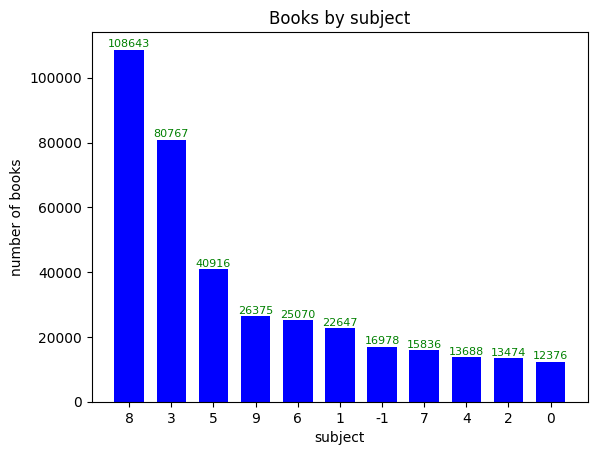

In [48]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points', fontsize=8, ha='center', color='green')
plt.show()

### 가로 막대 그래프 그리기_barh()
- height매개변수
- (val,idx)
- va : 텍스트 위치(top, center, bottom)
- 축 이름 바꾸기
- 텍스트의 x, y좌표가 바뀌어야함

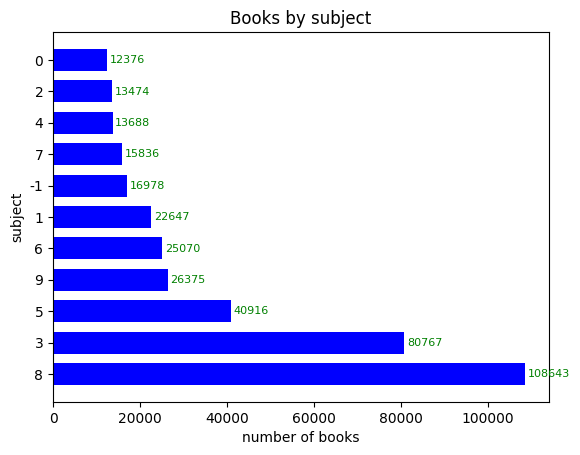

In [53]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext=(2,0), textcoords='offset points', fontsize=8, va='center', color='green')
plt.show()